In [20]:
import SimpleITK as sitk
from PIL import Image
import torch
import torchvision
import os
import numpy as np
import glob
import pandas as pd
import matplotlib.pyplot as plt
import random
import time
import cv2
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
import PIL

In [29]:
inputbladder_list = glob.glob('H:/SingleVMAT/stack/bladder/*.npy')
inputrectum_list = glob.glob('H:/SingleVMAT/stack/rectum/*.npy')
inputfeml_list = glob.glob('H:/SingleVMAT/stack/lfem/*.npy')
inputfemr_list = glob.glob('H:/SingleVMAT/stack/rfem/*.npy')
inputSI_list = glob.glob('H:/SingleVMAT/stack/bowel/*.npy')
inputPTV_list = glob.glob('H:/SingleVMAT/stack/PTV/*.npy')
output_list = glob.glob('H:/SingleVMAT/RD/*.npy')
CT_list = glob.glob('H:/SingleVMAT/stack/CT/*.npy')

In [22]:
CT_list

[]

In [23]:
def getInputbladderFromNPY(inputbladder_list):
    npy_count = np.shape(inputbladder_list)[0]
    for count in range(npy_count):
        input = inputbladder_list[count]
        img_npy = np.load(input)
        img_npy = img_npy.astype(np.float32)
        str = os.path.split(inputbladder_list[count])[-1].split('_')[-1].split('.')[0]
        for i1 in range(np.shape(img_npy)[-1]//16):
            img_select = img_npy[:,:, 16*i1 : 16*i1+16 ]
            save_name = 'stack_split/bladder/inputbladder_{}_{}.npy'.format(str,i1)
            np.save(save_name,img_select)
            print(img_select.shape)
            
        for i2 in range(np.shape(img_npy)[-1]//16):
            img_select = img_npy[:,:,(np.shape(img_npy)[-1] - 16*i2 - 16): (np.shape(img_npy)[-1] - 16*i2)]
            save_name = 'stack_split/bladder/inputbladder_{}_{}.npy'.format(str,i1 + i2 + 1)
            np.save(save_name,img_select)
            print(img_select.shape)

def getInputrectumFromNPY(inputrectum_list):
    npy_count = np.shape(inputrectum_list)[0]
    for count in range(npy_count):
        input = inputrectum_list[count]
        img_npy = np.load(input)
        img_npy = img_npy.astype(np.float32)
        str = os.path.split(inputrectum_list[count])[-1].split('_')[-1].split('.')[0]
        for i1 in range(np.shape(img_npy)[-1]//16):
            img_select = img_npy[:,:, 16*i1 : 16*i1+16 ]
            save_name = 'stack_split/rectum/inputrectum_{}_{}.npy'.format(str,i1)
            np.save(save_name,img_select)
            print(img_select.shape)
            
        for i2 in range(np.shape(img_npy)[-1]//16):
            img_select = img_npy[:,:,(np.shape(img_npy)[-1] - 16*i2 - 16): (np.shape(img_npy)[-1] - 16*i2)]
            save_name = 'stack_split/rectum/inputrectum_{}_{}.npy'.format(str,i1 + i2 + 1)
            np.save(save_name,img_select)
            print(img_select.shape)

def getInputfemlFromNPY(inputfeml_list):
    npy_count = np.shape(inputfeml_list)[0]
    for count in range(npy_count):
        input = inputfeml_list[count]
        img_npy = np.load(input)
        img_npy = img_npy.astype(np.float32)
        str = os.path.split(inputfeml_list[count])[-1].split('_')[-1].split('.')[0]
        for i1 in range(np.shape(img_npy)[-1]//16):
            img_select = img_npy[:,:, 16*i1 : 16*i1+16 ]
            save_name = 'stack_split/lfem/inputfeml_{}_{}.npy'.format(str,i1)
            np.save(save_name,img_select)
            print(img_select.shape)
            
        for i2 in range(np.shape(img_npy)[-1]//16):
            img_select = img_npy[:,:,(np.shape(img_npy)[-1] - 16*i2 - 16): (np.shape(img_npy)[-1] - 16*i2)]
            save_name = 'stack_split/lfem/inputfeml_{}_{}.npy'.format(str,i1 + i2 + 1)
            np.save(save_name,img_select)      
            print(img_select.shape) 

def getInputfemrFromNPY(inputfemr_list):
    npy_count = np.shape(inputfemr_list)[0]
    for count in range(npy_count):
        input = inputfemr_list[count]
        img_npy = np.load(input)
        img_npy = img_npy.astype(np.float32)
        str = os.path.split(inputfemr_list[count])[-1].split('_')[-1].split('.')[0]
        for i1 in range(np.shape(img_npy)[-1]//16):
            img_select = img_npy[:,:, 16*i1 : 16*i1+16 ]
            save_name = 'stack_split/rfem/inputfemr_{}_{}.npy'.format(str,i1)
            np.save(save_name,img_select)
            print(img_select.shape)
            
        for i2 in range(np.shape(img_npy)[-1]//16):
            img_select = img_npy[:,:,(np.shape(img_npy)[-1] - 16*i2 - 16): (np.shape(img_npy)[-1] - 16*i2)]
            save_name = 'stack_split/rfem/inputfemr_{}_{}.npy'.format(str,i1 + i2 + 1)
            np.save(save_name,img_select)  
            print(img_select.shape)


def getInputSIFromNPY(inputSI_list):
    npy_count = np.shape(inputSI_list)[0]
    for count in range(npy_count):
        input = inputSI_list[count]
        img_npy = np.load(input)
        img_npy = img_npy.astype(np.float32)
        str = os.path.split(inputSI_list[count])[-1].split('_')[-1].split('.')[0]
        for i1 in range(np.shape(img_npy)[-1]//16):
            img_select = img_npy[:,:, 16*i1 : 16*i1+16 ]
            save_name = 'stack_split/bowel/inputSI_{}_{}.npy'.format(str,i1)
            np.save(save_name,img_select)
            print(img_select.shape)
            
        for i2 in range(np.shape(img_npy)[-1]//16):
            img_select = img_npy[:,:,(np.shape(img_npy)[-1] - 16*i2 - 16): (np.shape(img_npy)[-1] - 16*i2)]
            save_name = 'stack_split/bowel/inputSI_{}_{}.npy'.format(str,i1 + i2 + 1)
            np.save(save_name,img_select) 
            print(img_select.shape)


def getInputPTVFromNPY(inputPTV_list):
    npy_count = np.shape(inputPTV_list)[0]
    for count in range(npy_count):
        input = inputPTV_list[count]
        img_npy = np.load(input)
        img_npy = img_npy.astype(np.float32)
        str = os.path.split(inputPTV_list[count])[-1].split('_')[-1].split('.')[0]
        for i1 in range(np.shape(img_npy)[-1]//16):
            img_select = img_npy[:,:, 16*i1 : 16*i1+16 ]
            save_name = 'stack_split/PTV/inputPTV_{}_{}.npy'.format(str,i1)
            np.save(save_name,img_select)
            print(img_select.shape)
            
        for i2 in range(np.shape(img_npy)[-1]//16):
            img_select = img_npy[:,:,(np.shape(img_npy)[-1] - 16*i2 - 16): (np.shape(img_npy)[-1] - 16*i2)]
            save_name = 'stack_split/PTV/inputPTV_{}_{}.npy'.format(str,i1 + i2 + 1)
            np.save(save_name,img_select) 
            print(img_select.shape)





# getInputbladderFromNPY(inputbladder_list)
# getInputrectumFromNPY(inputrectum_list)
# getInputfemlFromNPY(inputfeml_list)
# getInputfemrFromNPY(inputfemr_list)
getInputSIFromNPY(inputSI_list)
getInputPTVFromNPY(inputPTV_list)


In [30]:
def getOutputFromNPY(output_list):
    npy_count = np.shape(output_list)[0]
    for count in range(npy_count):
        output = output_list[count]
        img_npy = np.load(output)/55
        str = os.path.split(output_list[count])[-1].split('_')[0].split('T')[1]
        for i1 in range(np.shape(img_npy)[-1]//16):
            img_select = img_npy[:,:, 16*i1 : 16*i1+16]
            save_name = 'stack_split/RD/output_{}_{}.npy'.format(str,i1)
            np.save(save_name,img_select)
            print(img_select.shape)
            
        for i2 in range(np.shape(img_npy)[-1]//16):
            img_select = img_npy[:,:,(np.shape(img_npy)[-1] - 16*i2 - 16): (np.shape(img_npy)[-1] - 16*i2)]
            save_name = 'stack_split/RD/output_{}_{}.npy'.format(str,i1 + i2 + 1)
            np.save(save_name,img_select)
            print(img_select.shape)

getOutputFromNPY(output_list)    

(512, 512, 16)
(512, 512, 16)
(512, 512, 16)
(512, 512, 16)
(512, 512, 16)
(512, 512, 16)
(512, 512, 16)
(512, 512, 16)
(512, 512, 16)
(512, 512, 16)
(512, 512, 16)
(512, 512, 16)
(512, 512, 16)
(512, 512, 16)
(512, 512, 16)
(512, 512, 16)
(512, 512, 16)
(512, 512, 16)
(512, 512, 16)
(512, 512, 16)
(512, 512, 16)
(512, 512, 16)
(512, 512, 16)
(512, 512, 16)
(512, 512, 16)
(512, 512, 16)
(512, 512, 16)
(512, 512, 16)
(512, 512, 16)
(512, 512, 16)
(512, 512, 16)
(512, 512, 16)
(512, 512, 16)
(512, 512, 16)
(512, 512, 16)
(512, 512, 16)
(512, 512, 16)
(512, 512, 16)
(512, 512, 16)
(512, 512, 16)
(512, 512, 16)
(512, 512, 16)
(512, 512, 16)
(512, 512, 16)
(512, 512, 16)
(512, 512, 16)
(512, 512, 16)
(512, 512, 16)
(512, 512, 16)
(512, 512, 16)
(512, 512, 16)
(512, 512, 16)
(512, 512, 16)
(512, 512, 16)
(512, 512, 16)
(512, 512, 16)
(512, 512, 16)
(512, 512, 16)
(512, 512, 16)
(512, 512, 16)
(512, 512, 16)
(512, 512, 16)
(512, 512, 16)
(512, 512, 16)
(512, 512, 16)
(512, 512, 16)
(512, 512,

In [25]:
def getCTFromNPY(CT_list):
    npy_count = np.shape(CT_list)[0]
    for count in range(npy_count):
        CT = CT_list[count]
        img_npy = np.load(CT) 
        img_npy = img_npy.astype(np.float32) - 1024
        
        np.place(img_npy, img_npy > 400, 400)
        np.place(img_npy, img_npy < -400, -400)
        print(np.max(img_npy))
        print(np.min(img_npy))
        img_npy = (img_npy + 400)/(400 + 400)
        print(np.max(img_npy))
        print(np.min(img_npy))
        str = os.path.split(CT_list[count])[-1].split('_')[-1].split('.')[0]
        for i1 in range(np.shape(img_npy)[-1]//16):
            img_select = img_npy[:,:, 16*i1 : 16*i1+16 ]
            save_name = 'stack_split/CT/CT_{}_{}.npy'.format(str,i1)
            np.save(save_name,img_select)
            print(img_select.shape)
            
        for i2 in range(np.shape(img_npy)[-1]//16):
            img_select = img_npy[:,:,(np.shape(img_npy)[-1] - 16*i2 - 16): (np.shape(img_npy)[-1] - 16*i2)]
            save_name = 'stack_split/CT/CT_{}_{}.npy'.format(str,i1 + i2 + 1)
            np.save(save_name,img_select)
            print(img_select.shape)
            
getCTFromNPY(CT_list) 

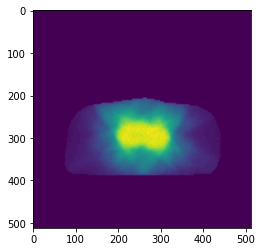

In [26]:
img = np.load('H:\SingleVMAT\stack_split\RD\output_212183_6.npy')
plt.imshow(img[:,:,15])

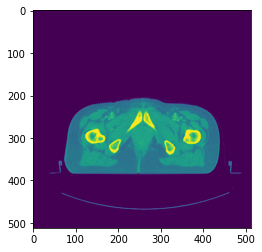

In [27]:
img = np.load('H:\SingleVMAT\stack_split\CT\CT_RT212183_6.npy')
plt.imshow(img[:,:,15])